 # **Proyek Predictive Analytics : Prediksi Risiko Stroke**

 - Nama : Dimas Aditia Anugerah Setiady
 - Email : mc240d5y0910@student.devacademy.id
 - ID Dicoding : MC240D5Y0910


Stroke merupakan salah satu penyebab utama kematian dan kecacatan di dunia. Menurut data dari World Health Organization (WHO), sekitar 15 juta orang di dunia mengalami stroke setiap tahun. Dari jumlah tersebut, sekitar 5 juta orang meninggal dan 5 juta lainnya menjadi cacat permanen akibat komplikasi yang ditimbulkan [WHO, 2023].

Stroke dapat dicegah apabila faktor risikonya seperti tekanan darah tinggi, diabetes, merokok, obesitas, dan gaya hidup tidak sehat dapat dideteksi dan dikendalikan sedini mungkin. Namun, deteksi dini sering kali terhambat karena keterbatasan sumber daya medis, terutama di negara berkembang.

Dengan berkembangnya teknologi dan ketersediaan data kesehatan, pendekatan berbasis machine learning dapat membantu memprediksi risiko stroke secara otomatis dan cepat. Model prediktif ini dapat digunakan oleh tenaga medis atau aplikasi kesehatan digital untuk memberi peringatan dini bagi pasien yang berisiko tinggi.


### **Mengapa dan Bagaimana Masalah Ini Harus Diselesaikan**
Masalah ini penting untuk diselesaikan karena:
- Stroke bisa dicegah jika faktor risikonya dikenali sejak dini.
- Sistem prediksi berbasis machine learning dapat membantu dalam skrining awal, terutama di daerah dengan akses terbatas ke tenaga medis.
- Efisiensi waktu dan biaya: deteksi awal melalui data digital mengurangi kebutuhan uji klinis yang mahal dan memakan waktu.

Dengan membangun model prediksi stroke, instansi kesehatan, rumah sakit, maupun aplikasi kesehatan personal dapat memberikan peringatan atau rekomendasi medis yang lebih tepat dan personal.

### **Referensi**
- World Health Organization. (2023). Stroke: Key Facts. Diakses dari: https://www.who.int/news-room/fact-sheets/detail/stroke
- Benjamin, E. J., et al. (2019). Heart disease and stroke statistics—2019 update: a report from the American Heart Association. Circulation, 139(10), e56–e528. https://doi.org/10.1161/CIR.0000000000000659
- Feigin, V. L., et al. (2021). Global, regional, and national burden of stroke and its risk factors, 1990–2019: a systematic analysis for the Global Burden of Disease Study 2019. The Lancet Neurology, 20(10), 795–820.


## **Business Understanding**
### **Problem Statement**
Stroke merupakan penyakit yang dapat menyebabkan kematian atau kecacatan jangka panjang. Banyak pasien stroke datang ke rumah sakit setelah gejala muncul, padahal stroke dapat dicegah jika faktor risikonya terdeteksi lebih awal. Masalah utamanya adalah:
- Bagaimana cara mengidentifikasi individu yang berisiko mengalami stroke berdasarkan data profil kesehatan mereka?
- Dapatkah kita membangun model machine learning yang mampu memprediksi risiko stroke secara akurat dan efisien?

### **Goals**
Tujuan dari proyek ini adalah:
- Mengembangkan model machine learning untuk memprediksi risiko stroke berdasarkan fitur-fitur seperti usia, tekanan darah, kadar glukosa, riwayat hipertensi, dan kebiasaan merokok.
- Memberikan solusi prediktif yang bisa diintegrasikan dalam sistem pendukung keputusan medis (Clinical Decision Support System), atau aplikasi kesehatan digital untuk masyarakat umum.
- Membantu pencegahan stroke dini melalui identifikasi kelompok berisiko tinggi secara otomatis.

Sumber Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### **Solution Statement**
Untuk mencapai tujuan di atas, beberapa solusi akan diuji dan dibandingkan:
- Baseline model: Logistic Regression – sebagai model sederhana dan interpretable.
- Model alternatif:
    - Random Forest Classifier
    - XGBoost Classifier
    - K-Nearest Neighbors

Setiap model akan dievaluasi menggunakan metrik berikut:
- Accuracy
- Precision
- Recall
- F1-Score, dan
- ROC-AUC jika ingin mengevaluasi performa model terhadap imbalance class.





### **Import Library**
Pada tahap ini, berbagai library Python yang diperlukan untuk analisis data dan machine learning akan diimpor. Library ini akan digunakan dalam seluruh proses eksplorasi, persiapan, pelatihan, dan evaluasi model.

In [50]:
# Library utama untuk manipulasi dan analisis data
import pandas as pd                 
import numpy as np   

# Visualisasi data
import seaborn as sns               
import matplotlib.pyplot as plt   

# Library Machine Learning dan Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

# Preprocessing dan evaluasi dari Scikit-learn
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.metrics import classification_report, confusion_matrix  

# Menyembunyikan warning agar output bersih
import warnings
warnings.simplefilter('ignore')

# Untuk keperluan visualisasi confusion matrix secara lebih baik
import itertools

## **Data Understanding**
Data Understanding merupakan tahap awal yang krusial dalam pengembangan proyek machine learning maupun data science. Tahap ini bertujuan untuk memahami isi, struktur, serta kualitas data yang akan dianalisis. Dalam proyek ini, proses Data Understanding akan dilakukan melalui tiga tahapan utama, yaitu:
- Melakukan load dataset 
- Melakukan univariate exploratory data analysis (EDA)
- Melakukan visualisasi data



In [51]:
# Load dataset dari google drive
url = "https://drive.google.com/uc?export=download&id=10THN9kB_RssZlg6fc3DubQpnLJAO_k44"
df = pd.read_csv(url)

# Cek 5 baris pertama dataset
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


#### **Univariate Exploratory Data Analysis**
Kolom-kolom pada Stroke Prediction Dataset adalah sebagai berikut:

1. id
Merupakan ID unik yang merepresentasikan masing-masing individu dalam dataset.

2. gender
Jenis kelamin individu, dengan kategori seperti 'Male', 'Female'dan other.

3. age
Usia individu dalam tahun. Variabel ini numerik dan penting untuk analisis risiko stroke berdasarkan usia.

4. hypertension
Status hipertensi (tekanan darah tinggi) individu, dengan nilai 0 berarti tidak memiliki hipertensi, dan 1 berarti memiliki hipertensi.

5. heart_disease
Status penyakit jantung, dengan nilai 0 berarti tidak memiliki penyakit jantung, dan 1 berarti memiliki penyakit jantung.

6. ever_married
Status pernikahan, berupa kategori 'Yes' atau 'No'.

7. work_type
Jenis pekerjaan individu, seperti 'children', 'Govt_job', 'Never_worked', 'Private', dan 'Self-employed'.

8. residence_type
Tempat tinggal, berupa kategori 'Urban' atau 'Rural'.

9. avg_glucose_level
Rata-rata kadar gula darah individu, berupa data numerik.

10. bmi
Indeks massa tubuh (Body Mass Index), berupa data numerik yang menunjukkan proporsi berat dan tinggi badan.

11. smoking_status
Status merokok individu, dengan kategori 'formerly smoked', 'never smoked', 'smokes', dan 'Unknown'.

12. stroke
Target variabel yang menunjukkan apakah individu mengalami stroke (1) atau tidak (0).

**Cek Informasi Dataset (struktur dan tipe data)**

In [52]:
# Melihat info dataset: jumlah data, tipe kolom, dan apakah ada missing value
print(df.info())

# Statistik deskriptif untuk data numerik
print(df.describe())

# Statistik deskriptif untuk data kategorikal
print(df.describe(include=['object']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

*Insight :*
- Dataset terdiri dari 5.110 baris dan 12 kolom.
- Tidak ada missing value, kecuali pada kolom bmi yang memiliki 201 nilai kosong (missing) dari total 5110 data (sekitar 3.9%).

**Cek Distribusi Variabel Univariate**

In [53]:
# Statistik dasar untuk variabel numerik
print(df[['age', 'avg_glucose_level', 'bmi']].describe())

# Cek missing value khusus pada bmi (sering ada missing)
print(df['bmi'].isnull().sum())


               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000
201


In [54]:
# Frekuensi kategori variabel kategorikal
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status', 'stroke']

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


Value counts for hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64


Value counts for heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64


Value counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


Value counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


Value counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


Value counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Value counts for stroke:
stroke
0    4861
1     249
Name: count, dtype: int64




#### **Visualisasi Univariate**

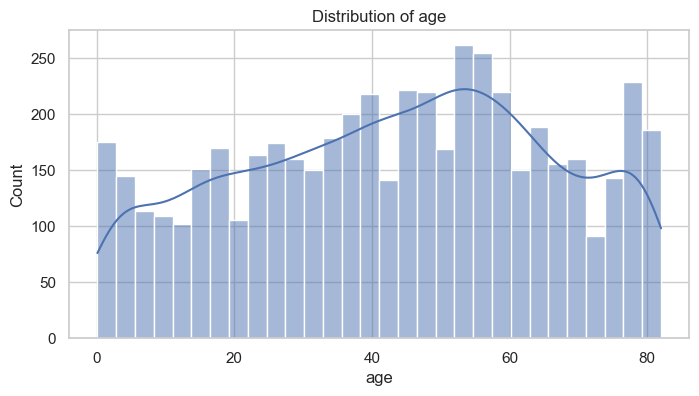

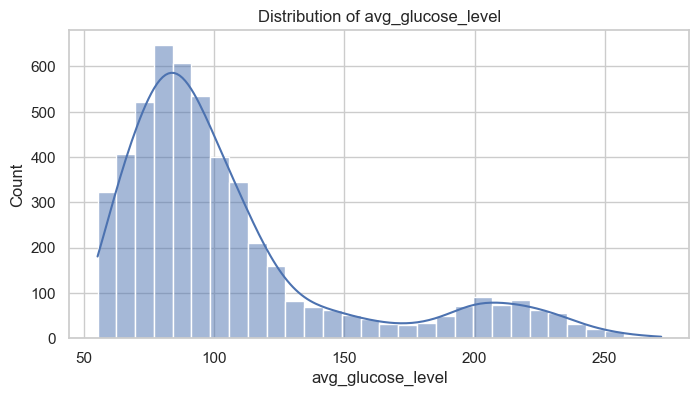

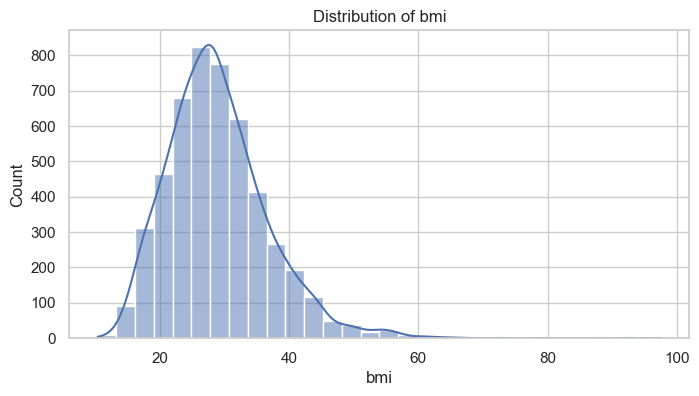

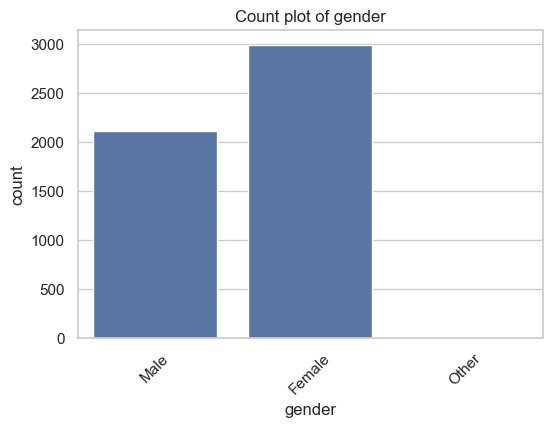

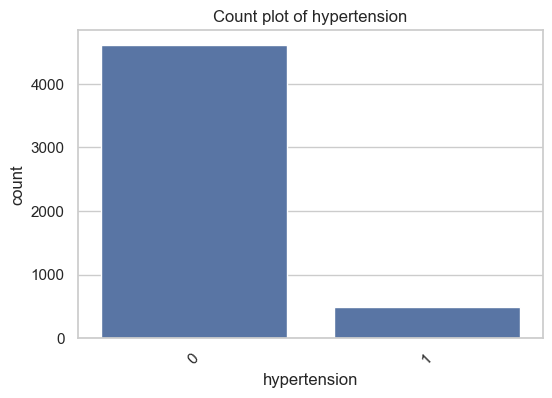

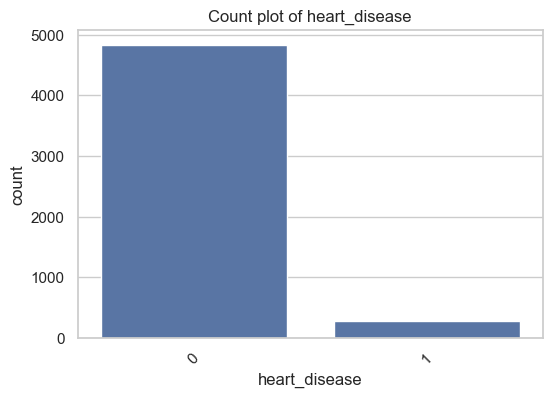

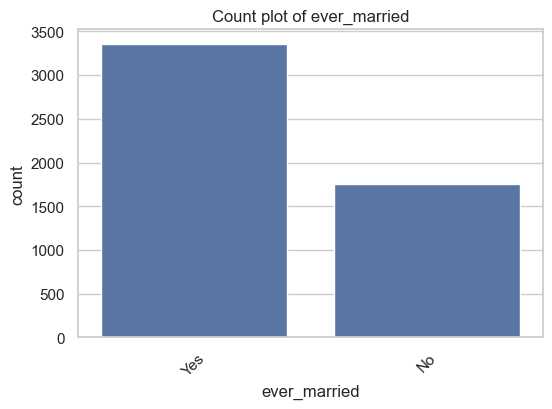

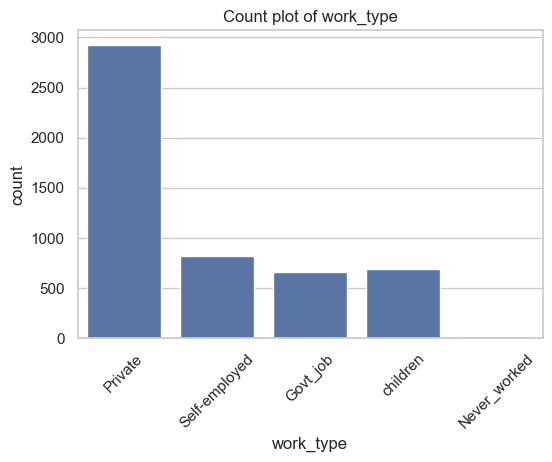

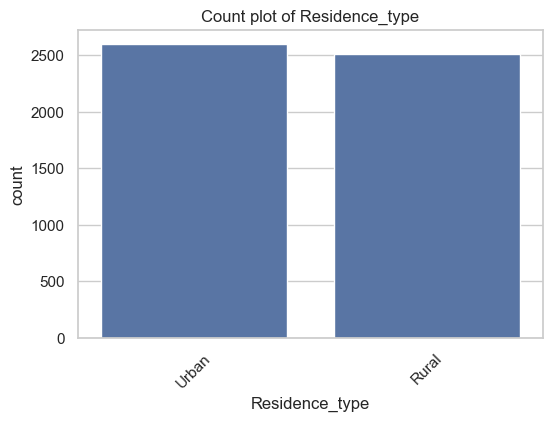

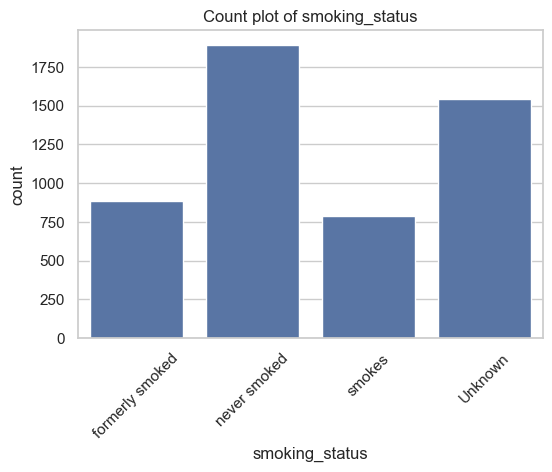

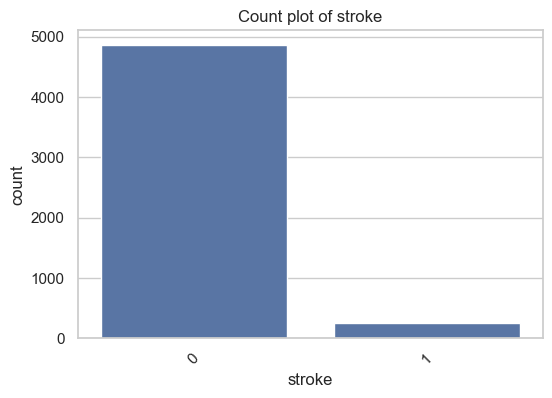

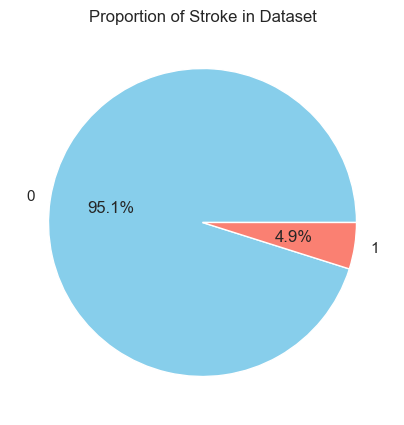

In [55]:
# Set style seaborn
sns.set(style="whitegrid")

# Histogram untuk variabel numerik
num_cols = ['age', 'avg_glucose_level', 'bmi']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bar plot untuk variabel kategorikal
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Visualisasi proporsi stroke (target)
plt.figure(figsize=(5,5))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Stroke in Dataset')
plt.ylabel('')
plt.show()


*Insight :*
- Distribusi Usia (age)
    - Distribusi berbentuk bimodal (dua puncak)
        - Kelompok usia muda (~0–20 tahun)
        - Kelompok usia dewasa-tua (~40–80 tahun)
- Banyak data pada usia lansia (60+), yang relevan untuk risiko stroke.

## **Data Preparation**
Pada proyek ini, tahap data preparation dilakukan untuk memastikan bahwa data yang digunakan dalam model prediksi stroke telah melalui proses pembersihan dan transformasi yang sesuai agar siap digunakan dalam algoritma machine learning. Proses ini meliputi penanganan nilai yang hilang, transformasi data kategorikal, normalisasi fitur numerik, dan pembagian data.

1. Pembersihan dan Penanganan Missing Values
Langkah pertama adalah mengecek nilai yang hilang dalam dataset. Hasil pengecekan menunjukkan bahwa kolom bmi memiliki sejumlah nilai yang hilang. Untuk menjaga integritas data dan menghindari kehilangan informasi, nilai yang hilang pada kolom bmi diimputasi menggunakan nilai median dari kolom tersebut. Metode imputasi median dipilih karena lebih robust terhadap outlier dibandingkan mean.

2. Encoding Variabel Kategorikal
Data ini mengandung beberapa variabel kategorikal yang perlu dikonversi ke format numerik agar dapat diproses oleh model machine learning.
- Untuk kolom kategorikal dengan dua kelas seperti gender, ever_married, dan Residence_type, digunakan Label Encoding, yang mengubah kategori menjadi representasi numerik 0 dan 1.
- Untuk kolom kategorikal dengan banyak kelas seperti work_type dan smoking_status, digunakan One-Hot Encoding. Pendekatan ini menciptakan kolom biner terpisah untuk setiap kategori unik, dan kolom pertama dari tiap kategori di-drop untuk menghindari multikolinearitas.

3. Seleksi Fitur dan Target
Fitur yang digunakan untuk pelatihan model adalah seluruh kolom kecuali id (karena tidak memiliki kontribusi dalam prediksi) dan stroke yang merupakan variabel target. Pemisahan dilakukan untuk memisahkan input (fitur) dan output (target) dalam proses pelatihan.

4. Normalisasi Fitur Numerik
Untuk menghindari bias model terhadap fitur dengan skala nilai yang besar, dilakukan normalisasi terhadap fitur numerik, yaitu age, avg_glucose_level, dan bmi. Proses ini menggunakan teknik Standard Scaling, di mana setiap nilai diubah menjadi nilai dengan distribusi standar (mean = 0, standard deviation = 1). Normalisasi ini penting terutama untuk algoritma yang berbasis jarak atau gradien.

5. Pembagian Data
Dataset yang telah dibersihkan dan diproses kemudian dibagi menjadi dua bagian, yaitu:
- 80% untuk data pelatihan (training set)
- 20% untuk data pengujian (test set)

In [56]:
# 1. Cek missing value
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [57]:
# 2. Tangani missing value pada kolom 'bmi'
df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [58]:
# 3. Cek data duplikat
duplicates = df.duplicated()
print(f"Jumlah duplikat: {duplicates.sum()}")

Jumlah duplikat: 0


In [59]:
# 4. Encoding variabel kategorikal (Label Encoding atau One-Hot Encoding)
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kolom biner
label_cols = ['gender', 'ever_married', 'Residence_type']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding untuk kolom multikategori
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

In [ ]:
# 5. Pisahkan fitur dan target
X = df.drop(columns=['id', 'stroke'])  
y = df['stroke']

In [61]:
# 6. Scaling fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])


In [62]:
# 7. Split data menjadi train dan test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek hasil akhir
print(X_train.shape, X_test.shape)

(4088, 15) (1022, 15)


In [63]:
# Menampilkan jumlah missing value per kolom
print(df.isnull().sum())

id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


*Insight :*
- Missing value telah berhasil ditangani dan dataset juga sudah berhasil dibagi, dataset kini berada dalam kondisi optimal untuk digunakan dalam proses lebih lanjut untuk prediksi stroke. 


## **Modeling**
Pada tahap ini, dilakukan pembuatan dan evaluasi model machine learning untuk memprediksi apakah seseorang berisiko terkena stroke berdasarkan fitur-fitur yang tersedia. Beberapa algoritma digunakan untuk dibandingkan performanya, baik dari segi akurasi maupun ketepatan dalam menangani data imbalance.

#### **1. Baseline Model: Logistic Regression**

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

#### **2. Random Forest Classifier**

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

#### **3. XGBoost Classifier**

In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### **4. K-Nearest Neighbors (KNN)**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

## **Evaluasi Model**
Setiap model dievaluasi menggunakan test set (X_test, y_test) dan hasilnya dibandingkan. Berikut ini adalah evaluasi dari keempat model yang diuji:

#### **1. Logistic Regression (Baseline)**


In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression
[[722 250]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022

ROC-AUC Score: 0.8437037037037037


*Insight :*
- Logistic Regression sebagai baseline memberikan recall yang tinggi (0.80) untuk kelas minoritas (stroke), meskipun precision-nya sangat rendah (0.14). Ini berarti model mampu menangkap sebagian besar kasus stroke, walau dengan banyak false positive. Dalam konteks medis, ini lebih dapat diterima karena lebih baik salah memberi peringatan daripada melewatkan kasus stroke. ROC-AUC-nya juga cukup baik di 0.84.

#### **2. Random Forest Classifier**

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


Random Forest
[[970   2]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC-AUC Score: 0.7786728395061728


*Insight :*
- Random Forest memiliki akurasi tertinggi (95%) dan sangat baik dalam mengenali kelas mayoritas (non-stroke), tetapi gagal sepenuhnya mengenali kasus stroke (recall = 0.00). Ini berarti model sama sekali tidak berguna untuk mendeteksi stroke, sehingga tidak cocok meskipun akurasinya tinggi. ROC-AUC-nya pun lebih rendah (0.77).

#### **3. XGBoost Classifier**

In [70]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


XGBoost
[[949  23]
 [ 46   4]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.15      0.08      0.10        50

    accuracy                           0.93      1022
   macro avg       0.55      0.53      0.53      1022
weighted avg       0.91      0.93      0.92      1022

ROC-AUC Score: 0.7924897119341564


*Insight :*
- XGBoost mampu sedikit mengenali kasus stroke (recall = 0.08) dengan ROC-AUC 0.79. Meskipun hasilnya lebih baik daripada Random Forest dan KNN untuk kelas minoritas, model ini masih belum cukup baik secara f1-score dan tidak lebih unggul dari Logistic Regression.

#### **4. K-Nearest Neighbors (KNN)**

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
[[964   8]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



*Insight :*
- K-Nearest Neighbors (KNN) juga gagal mengenali kelas stroke (recall = 0.00), mirip dengan Random Forest. Walaupun akurasinya tinggi (94%), metrik ini menyesatkan dalam konteks data imbalance.
